<a href="https://colab.research.google.com/github/de-pesh/ML/blob/main/Image_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# 1. Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from tensorflow.keras.datasets import cifar10

In [5]:
# 2. Loading Dataset (CIFAR-10)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [7]:
# Using a subset of the dataset for faster implementation
x_data = x_train[:1000]
y_data = y_train[:1000]

In [13]:
# 3. Preprocess Images for CNN
from keras.preprocessing.image import img_to_array, load_img, array_to_img
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input


def preprocess_images(images):
    # Resize the images to match the input size for VGG16 (224x224)
    resized_images = np.array([img_to_array(array_to_img(image).resize((224, 224))) for image in images]) # Resize the image using the resize method of the PIL Image object
    return preprocess_input(resized_images)

x_data_resized = preprocess_images(x_data)

In [14]:
# 4. Feature Extraction using VGG16 (without top layer)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [15]:
# Extract features
features = base_model.predict(x_data_resized)

32/32 ━━━━━━━━━━━━━━━━━━━━ 561s 17s/step


In [16]:
# Flatten the features to use them for clustering
features_flattened = features.reshape(features.shape[0], -1)

In [17]:
# 5. Apply PCA for dimensionality reduction (optional, for visualization)
pca = PCA(n_components=50)
features_pca = pca.fit_transform(features_flattened)

In [18]:
# 6. Apply K-Means Clustering
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_labels = kmeans.fit_predict(features_pca)

In [19]:
# 7. Evaluate Clustering (Optional - Using silhouette score)
silhouette_avg = silhouette_score(features_pca, kmeans_labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.030665801838040352


In [20]:
# 8. Function to visualize the clusters
def plot_clusters(images, labels, n_clusters=10):
    plt.figure(figsize=(15, 10))
    for cluster in range(n_clusters):
        plt.subplot(2, 5, cluster + 1)
        cluster_images = images[labels == cluster]
        if len(cluster_images) > 0:
            plt.imshow(cluster_images[0])
            plt.title(f'Cluster {cluster}')
            plt.axis('off')
    plt.show()

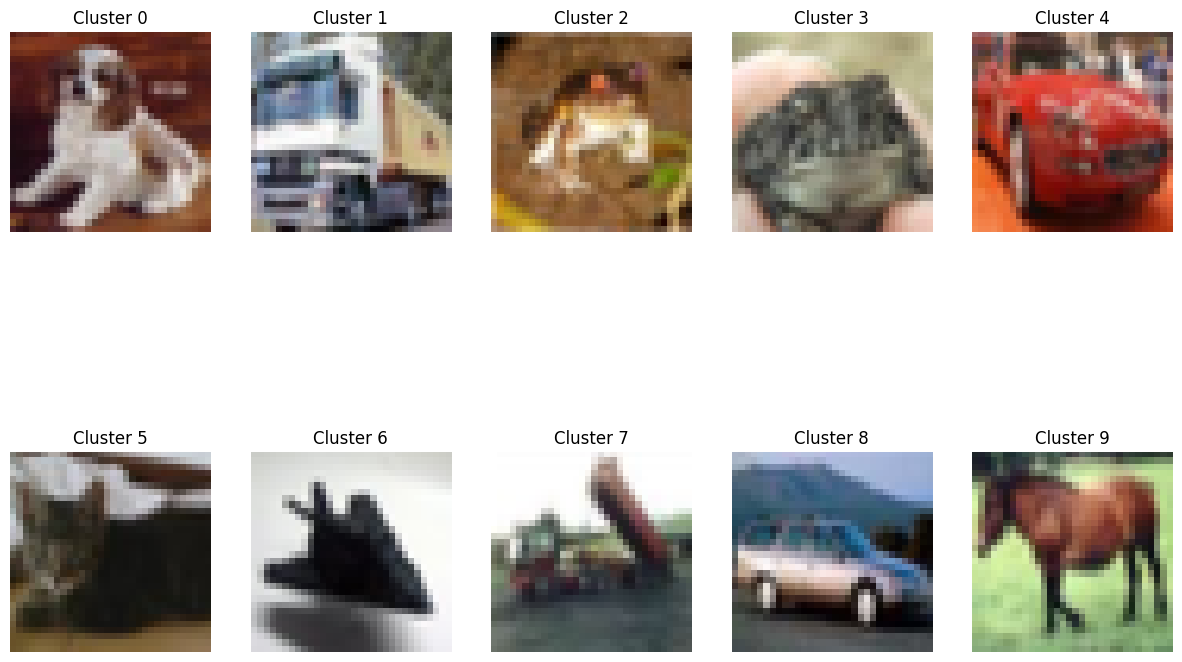

In [21]:
plot_clusters(x_data, kmeans_labels)